In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn  as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
scheme_2023_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/survey_results_schema.csv")

In [ ]:
stackoverflow_2023_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/survey_results_public.csv")

In [ ]:
scheme_2023_df=scheme_2023_df[["qname","question"]].set_index("qname").question

In [ ]:
stackoverflow_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
stackoverflow_2023_df["YearsCode"]=pd.to_numeric(stackoverflow_2023_df["YearsCode"],errors="coerce")
stackoverflow_2023_df["YearsCodePro"]=pd.to_numeric(stackoverflow_2023_df["YearsCodePro"],errors="coerce")

In [ ]:
stackoverflow_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
for i in stackoverflow_2023_df.columns:
    try:
        print(i,":\t",scheme_2023_df[i])
    except KeyError:
        pass

Q120 :	  
MainBranch :	 Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code". *
Age :	 What is your age? *
Employment :	 Which of the following best describes your current employment status? Select all that apply.
RemoteWork :	 Which best describes your current work situation?
CodingActivities :	 Which of the following best describes the code you write outside of work? Select all that apply.
EdLevel :	 Which of the following best describes the highest level of formal education that you’ve completed? *
LearnCode :	 How do you learn to code? Select all that apply.
LearnCodeOnline :	 What online resources do you use to learn to code? Select all that apply.
LearnCodeCoursesCert :	 What online courses or certifications do you use to learn to code? Select all that apply.
YearsCode :	 Including any education, how many years have you been coding in total?
YearsCodePro :	 NOT including education, how many years have yo

# Employment

In [ ]:
scheme_2023_df.Employment

'Which of the following best describes your current employment status? Select all that apply.'

In [ ]:
stackoverflow_2023_df_employment_data=stackoverflow_2023_df.Employment
stackoverflow_2023_df_employment_data

0                                                      NaN
1                                      Employed, full-time
2                                      Employed, full-time
3                                      Employed, full-time
4        Employed, full-time;Independent contractor, fr...
                               ...                        
89179    Employed, full-time;Independent contractor, fr...
89180               Student, full-time;Employed, part-time
89181                                  I prefer not to say
89182               Employed, part-time;Student, part-time
89183                                  Employed, full-time
Name: Employment, Length: 89184, dtype: object

In [ ]:
def multi_choice(series):
    result=series.to_frame()
    options=[]

    for idx,value in series[series.notnull()].items():
        for option in value.split(";"):
            if not option in result.columns:
                options.append(option)
                result[option]=False
            result.at[idx,option]=True
    return result[options]

In [ ]:
stackoverflow_2023_df_employment_data=multi_choice(stackoverflow_2023_df.Employment)

In [ ]:
employment_final=stackoverflow_2023_df_employment_data.sum().sort_values()
employment_final

I prefer not to say                                       549
Retired                                                   737
Not employed, and not looking for work                   1380
Student, part-time                                       3390
Not employed, but looking for work                       4178
Employed, part-time                                      5029
Student, full-time                                      11768
Independent contractor, freelancer, or self-employed    13988
Employed, full-time                                     60899
dtype: int64

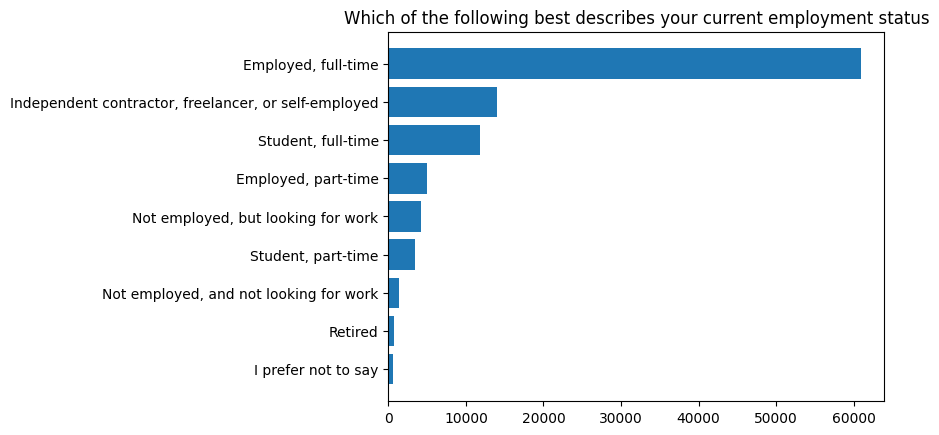

In [ ]:
plt.barh(employment_final.index,employment_final);
plt.title(scheme_2023_df.Employment.split("?")[0]);

Fom the graph one can inference that most of the full time employees uses the stackoverflow apart from this a significant numbert of students, frelancer,self-employed uses stackflow

In [ ]:
scheme_2023_df.MainBranch

'Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code". *'

In [ ]:
main_branch_data=stackoverflow_2023_df.MainBranch.value_counts(normalize=True)*100;
main_branch_data

I am a developer by profession                                                           75.391326
I am not primarily a developer, but I write code sometimes as part of my work/studies    10.039917
I am learning to code                                                                     5.562657
I code primarily as a hobby                                                               5.561536
I used to be a developer by profession, but no longer am                                  2.086697
None of these                                                                             1.357867
Name: MainBranch, dtype: float64

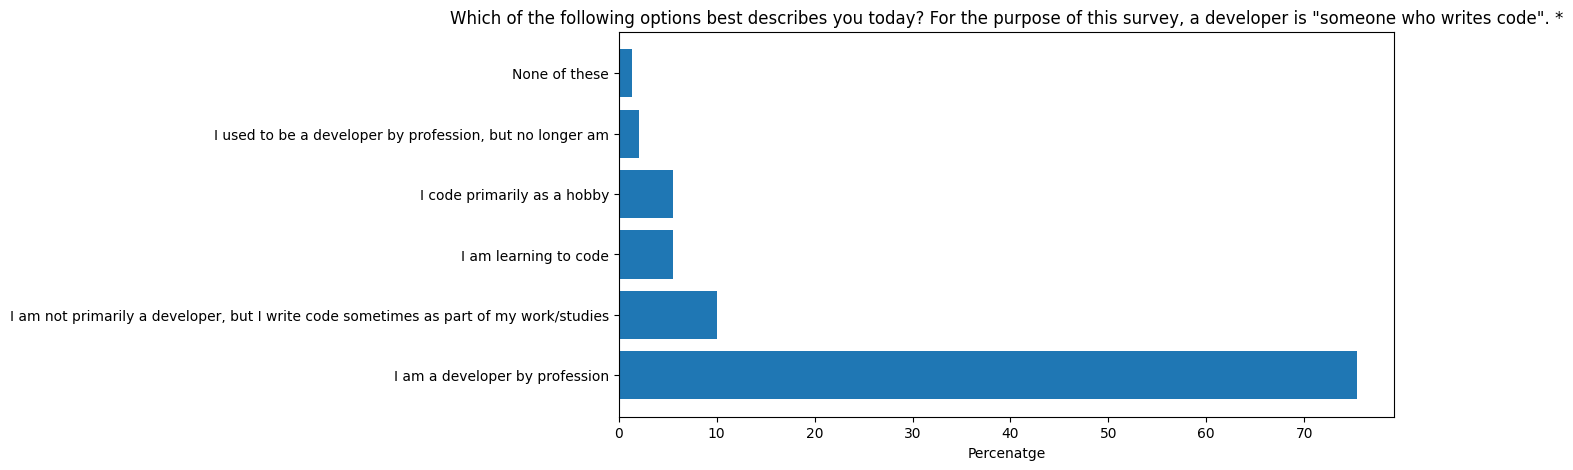

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(main_branch_data.index,main_branch_data);
plt.title(scheme_2023_df.MainBranch);
plt.xlabel("Percenatge");

In [ ]:
scheme_2023_df.DevType

'Which of the following describes your current job, the one you do most of the time? Please select only one.'

In [ ]:
stackoverflow_2023_df_devtype_data=stackoverflow_2023_df.DevType.value_counts()
stackoverflow_2023_df_devtype_data

Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
DevOps specialist                                 1387
Academic researcher                               1354
Research & Development role                       1353
Senior Executive (C-Suite, VP, etc.)              1332
Engineer, data                                    1248
Cloud infrastructure engineer                     1036
Developer, game or graphics                        866
Data or business analyst                           837
System adm

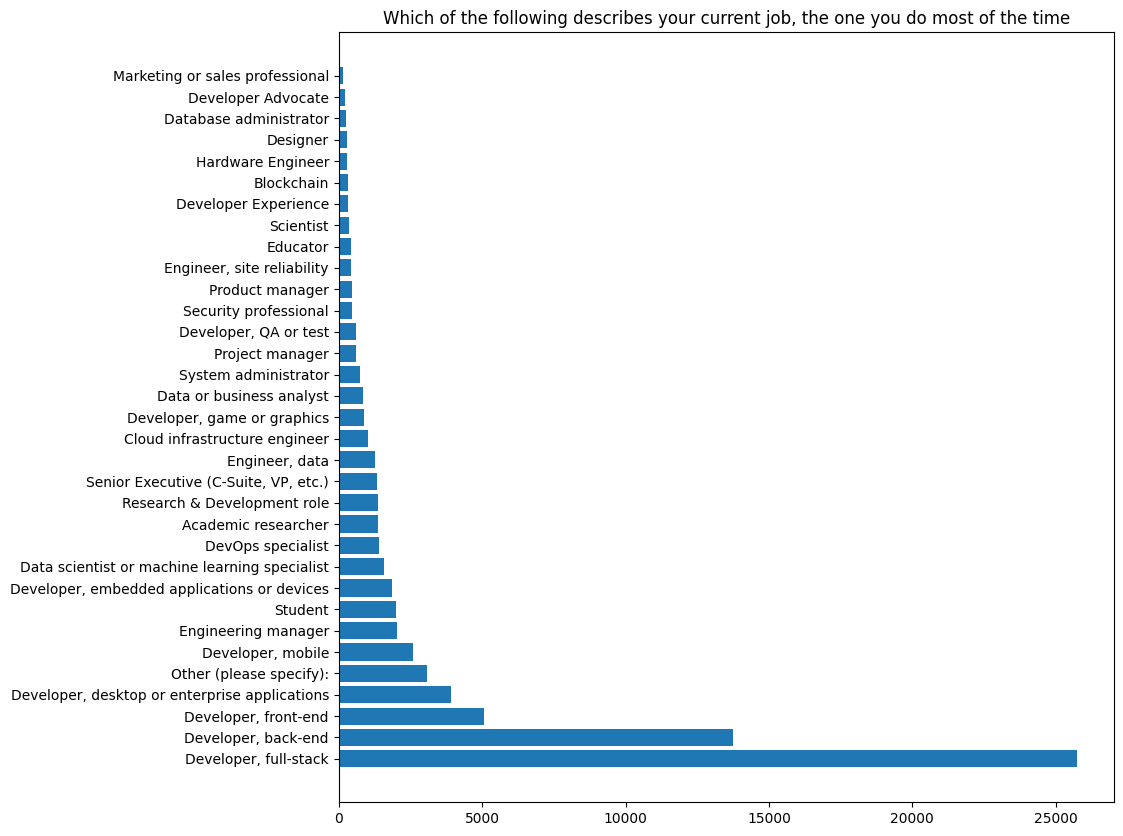

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(stackoverflow_2023_df_devtype_data.index,stackoverflow_2023_df_devtype_data);
plt.title(scheme_2023_df.DevType.split("?")[0]);

In [ ]:
scheme_2023_df.OrgSize

'Approximately how many people are employed by the company or organization you currently work for?  This should only include your primary company, and not the entire holding or parent company if that applies.'

In [ ]:
stackoverflow_2023_df_orgsize_data=stackoverflow_2023_df.OrgSize.value_counts()
stackoverflow_2023_df_orgsize_data

20 to 99 employees                                    13380
100 to 499 employees                                  12218
10,000 or more employees                               7929
1,000 to 4,999 employees                               7235
2 to 9 employees                                       6439
10 to 19 employees                                     5254
500 to 999 employees                                   4472
Just me - I am a freelancer, sole proprietor, etc.     4196
5,000 to 9,999 employees                               2677
I don’t know                                           1243
Name: OrgSize, dtype: int64

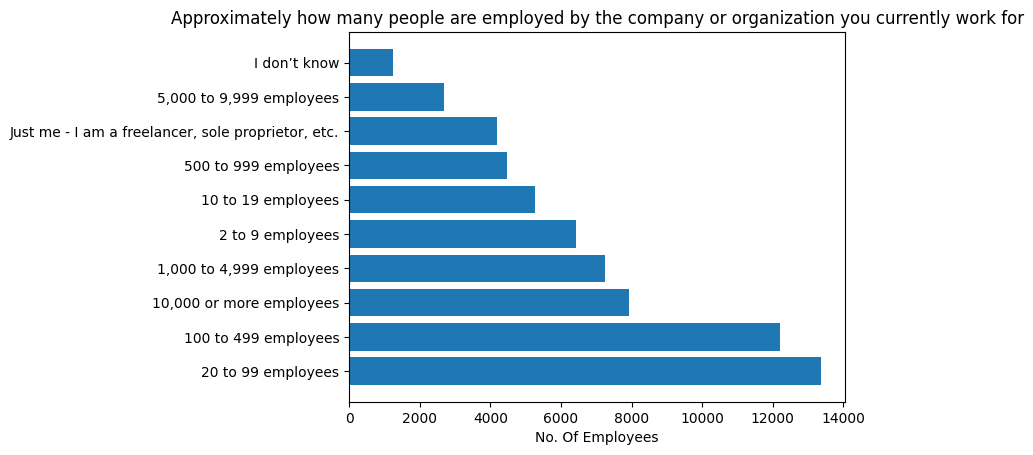

In [ ]:
plt.barh(stackoverflow_2023_df_orgsize_data.index,stackoverflow_2023_df_orgsize_data);
plt.title(scheme_2023_df.OrgSize.split("?")[0]);
plt.xlabel("No. Of Employees");

From this graph we can say that employee belonging to small commpies are more likely to use StackOverflow for their work.

In [ ]:
scheme_2023_df.Industry

'What industry is the company you work for in?'

In [ ]:
stackoverflow_2023_industry_data=stackoverflow_2023_df.Industry.value_counts()
stackoverflow_2023_industry_data

Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: Industry, dtype: int64

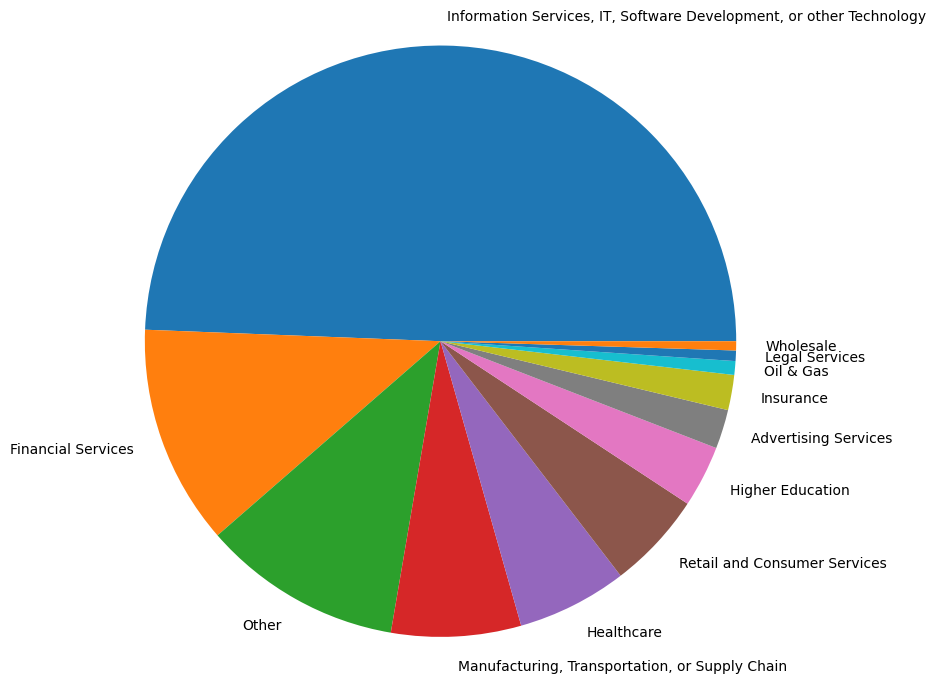

In [ ]:
plt.pie(stackoverflow_2023_industry_data,labels=stackoverflow_2023_industry_data.index,radius=2);

From the above pie chart we can say that most of the Technology sector employees are using StackOverFlow which is obuss as from previous inferences most of the developers or full stack developer are using StackOverFlow

In [ ]:
stackoverflow_2023_df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,86114.000000,64217.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,13.972049,11.508354,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,10.259548,9.070346,2.276847e+44,9.051989,6.814188e+05
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.000000,5.000000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,11.000000,9.000000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,20.000000,16.000000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,50.000000,50.000000,5.000000e+46,50.000000,7.435143e+07


In [ ]:
scheme_2023_df.CompTotal

'What is your current total <b>annual</b> compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent yearly salary. If you prefer not to answer, please leave the box empty.'

In [ ]:
stackoverflow_2023_df.drop(stackoverflow_2023_df[stackoverflow_2023_df.CompTotal<=1e+5].index,inplace=True)
stackoverflow_2023_df.drop(stackoverflow_2023_df[stackoverflow_2023_df.CompTotal>=9e+6].index,inplace=True)
stackoverflow_2023_df.describe()

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,ConvertedCompYearly
count,65601.000000,62680.00000,41637.000000,2.464200e+04,27809.000000,2.463700e+04
mean,45349.419475,13.84641,12.466316,5.970434e+05,12.141501,1.278006e+05
std,25869.832682,10.58064,9.415914,1.088496e+06,9.391824,1.301397e+05
min,1.000000,1.00000,1.000000,1.000010e+05,0.000000,7.000000e+00
25%,23650.000000,6.00000,5.000000,1.400000e+05,5.000000,5.640900e+04
50%,45679.000000,10.00000,10.000000,2.000000e+05,10.000000,1.200000e+05
75%,67986.000000,20.00000,18.000000,5.000000e+05,17.000000,1.650000e+05
max,89183.000000,50.00000,50.000000,8.900000e+06,50.000000,9.070484e+06


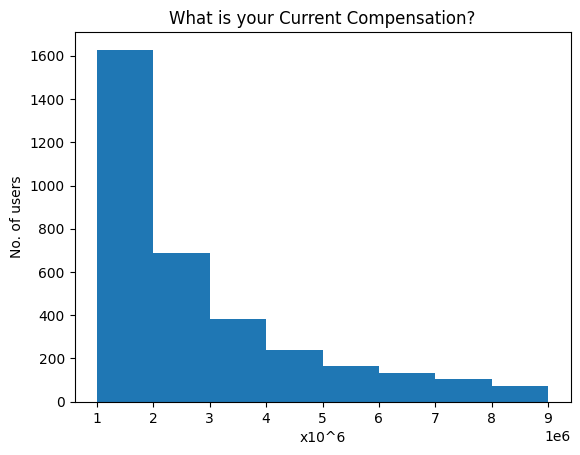

In [ ]:
plt.hist(stackoverflow_2023_df.CompTotal,bins=[1e+6,2e+6,3e+6,4e+6,5e+6,6e+6,7e+6,8e+6,9e+6]);
plt.xlabel("x10^6");
plt.ylabel("No. of users");
plt.title("What is your Current Compensation?");

From this graph we can easily see that majority of people using StackOverFlow are earning less than 20 lakhs as most of them are working in less employed or smaller companies.

From the Above Employment section we conclude that:

1-Most of the users are full time employed.

2-Majority of users are developer by profession.

3-Among which most of them are Full stack Developer

4-Most of the IT sector employees uses StackOverFlow

5- The salary of majority of users are less than 20 Lakhs

# Demographics

In [ ]:
scheme_2023_df.Age

'What is your age? *'

In [ ]:
stackoverflow_2023_df_age_data=stackoverflow_2023_df.Age.value_counts().sort_index()
stackoverflow_2023_df_age_data

18-24 years old       14824
25-34 years old       21855
35-44 years old       14364
45-54 years old        6361
55-64 years old        2664
65 years or older      1011
Prefer not to say       438
Under 18 years old     4084
Name: Age, dtype: int64

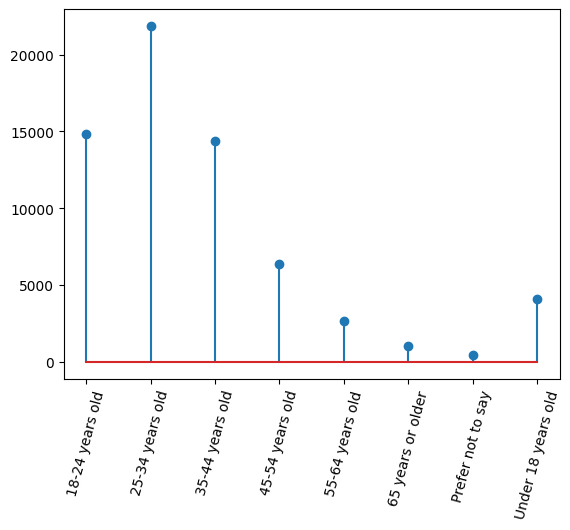

In [ ]:
plt.stem(stackoverflow_2023_df_age_data.index,stackoverflow_2023_df_age_data);
plt.xticks(rotation=75);

From the stem graph above we can see that a large number of users using StackOverflow are from the 18-44 age group among which most of belongs to 25-34 age group as from our previous interpretation most of them are full time employed.

In [ ]:
scheme_2023_df.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [ ]:
stackoverflow_2023_df_country_data=stackoverflow_2023_df.Country.value_counts().head(10)
stackoverflow_2023_df_country_data

United States of America                                16122
India                                                    5466
Germany                                                  3866
Canada                                                   2745
United Kingdom of Great Britain and Northern Ireland     2643
Poland                                                   2165
Australia                                                1796
Sweden                                                   1594
Brazil                                                   1561
Netherlands                                              1277
Name: Country, dtype: int64

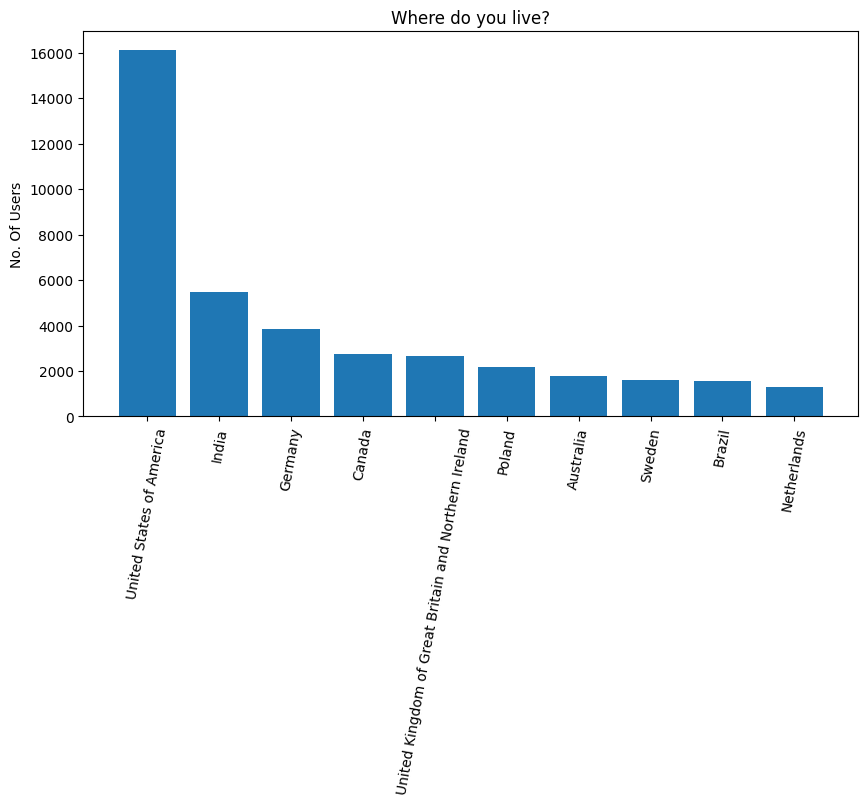

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(stackoverflow_2023_df_country_data.index,stackoverflow_2023_df_country_data);
plt.title("Where do you live?")
plt.ylabel("No. Of Users")
plt.xticks(rotation=80);

From this graph we seems that most of the users of StackOverFlow are belong to USA and India secured second position in terms of the number of users uses StackOverFlow

In [ ]:
scheme_2023_df.Currency

"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *"

In [ ]:
stackoverflow_2023_df_currency_data=stackoverflow_2023_df.Currency.value_counts().head(10)
stackoverflow_2023_df_currency_data

USD\tUnited States dollar    12870
EUR European Euro             5727
INR\tIndian rupee             3487
CAD\tCanadian dollar          1885
GBP\tPound sterling           1526
PLN\tPolish zloty             1425
AUD\tAustralian dollar        1310
SEK\tSwedish krona            1285
BRL\tBrazilian real           1043
DKK\tDanish krone              659
Name: Currency, dtype: int64

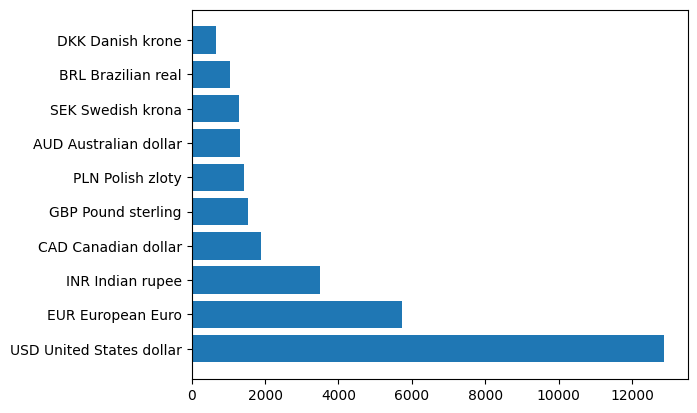

In [ ]:
plt.barh(stackoverflow_2023_df_currency_data.index.str.replace("\t"," "),stackoverflow_2023_df_currency_data);

It is obvious that most of the users of StackOverFlow are using USD as most of its users are belonging to USA

From this section we conclude that a mqjor group of users of StackOverFlow is from United States of America and lies in the age group of 18-44 years

# Eduction Level

In [ ]:
scheme_2023_df.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [ ]:
stackoverflow_2023_df_edlevel_data=stackoverflow_2023_df.EdLevel.value_counts()
stackoverflow_2023_df_edlevel_data

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26987
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13618
Some college/university study without earning a degree                                 8747
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7509
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2652
Associate degree (A.A., A.S., etc.)                                                    1949
Primary/elementary school                                                              1789
Something else                                                                         1139
Name: EdLevel, dtype: int64

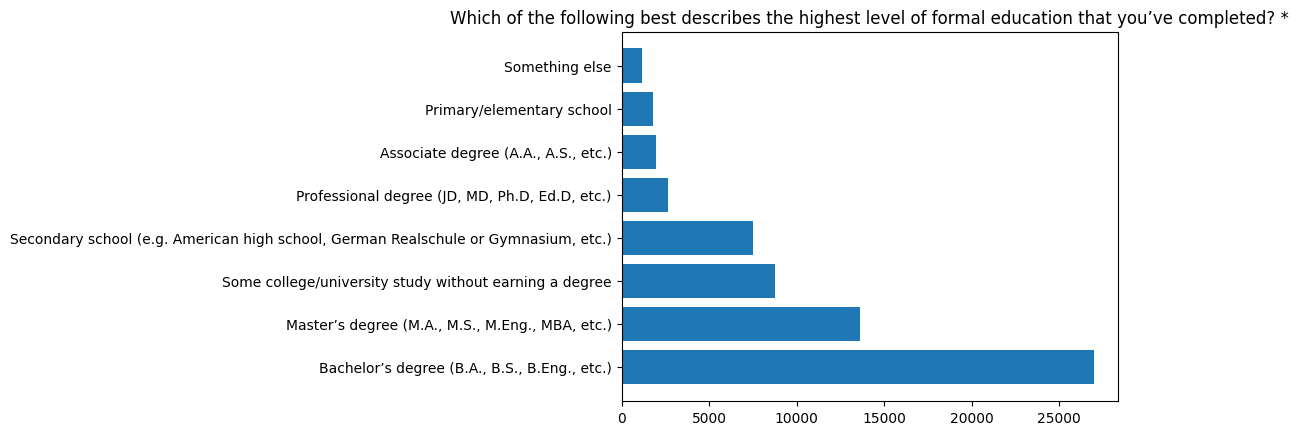

In [ ]:
plt.barh(stackoverflow_2023_df_edlevel_data.index,stackoverflow_2023_df_edlevel_data);
plt.title(scheme_2023_df.EdLevel);

From this graph it can be seen that a large numbe of users have done Bachelor's degree as the highest formal education but apart from this a lot of users have done Master'degree and even are the college students and a lesser number of  users with Professional degree uses stackoverflow

In [ ]:
scheme_2023_df.LearnCode

'How do you learn to code? Select all that apply.'

In [ ]:
stackoverflow_2023_df_learncode_data=multi_choice(stackoverflow_2023_df.LearnCode).sum()
stackoverflow_2023_df_learncode_data

Books / Physical media                                 33325
Colleague                                              13865
Friend or family member                                 7645
Hackathons (virtual or in-person)                       5391
Online Courses or Certification                        31083
On the job training                                    27479
Other online resources (e.g., videos, blogs, forum)    51302
School (i.e., University, College, etc)                32105
Coding Bootcamp                                         6477
Other (please specify):                                 4108
dtype: int64

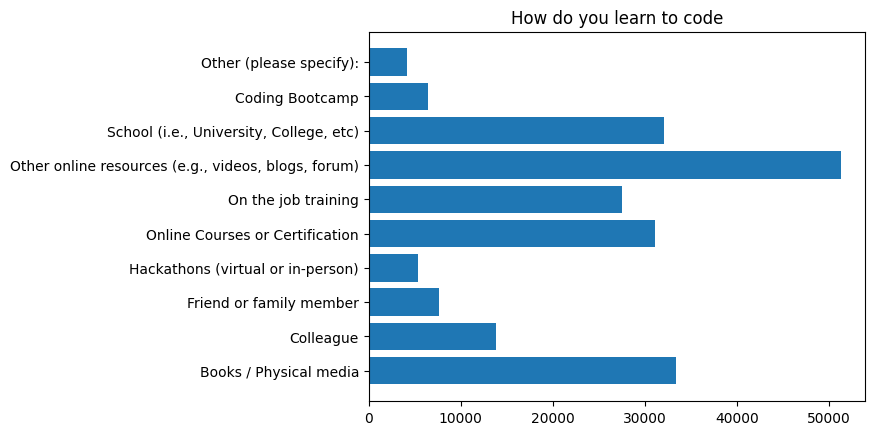

In [ ]:
plt.barh(stackoverflow_2023_df_learncode_data.index,stackoverflow_2023_df_learncode_data);
plt.title(scheme_2023_df.LearnCode.split("?")[0]);

From the graph it is clear that most of the users are learning to code from online resources which includes videos,blogs,forums,etc and a significant number of students learn to code from their college or have done a certification course and In the ara if technology a significant number of users learn to code from Books or Physical media.

In [ ]:
scheme_2023_df.LearnCodeOnline

'What online resources do you use to learn to code? Select all that apply.'

In [ ]:
stackoverflow_2023_df_learnonline_df=multi_choice(stackoverflow_2023_df.LearnCodeOnline).sum()
stackoverflow_2023_df_learnonline_df

Formal documentation provided by the owner of the tech         45861
Blogs with tips and tricks                                     38821
Books                                                          22546
Recorded coding sessions                                       14723
How-to videos                                                  31018
Video-based Online Courses                                     25261
Written-based Online Courses                                   18207
Auditory material (e.g., podcasts)                              4049
Online challenges (e.g., daily or weekly coding challenges)    11626
Written Tutorials                                              30340
Click to write Choice 20                                       22046
Stack Overflow                                                 42116
Interactive tutorial                                           13537
Certification videos                                            6909
Programming Games                 

Text(0.5, 1.0, 'What online resources do you use to learn to code')

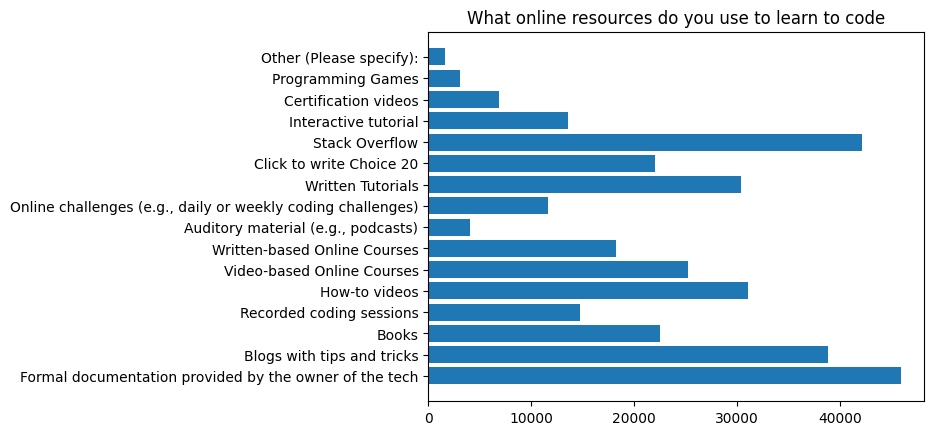

In [ ]:
plt.barh(stackoverflow_2023_df_learnonline_df.index,stackoverflow_2023_df_learnonline_df)
plt.title(scheme_2023_df.LearnCodeOnline.split("?")[0])

From this graph it can seen that among the users who learn to code from online resources uses formal documentation and StackOverFlow most of time apart from this they learn by reading blogs with tips and tricks and by watching tutorials.

In [ ]:
scheme_2023_df.LearnCodeCoursesCert

'What online courses or certifications do you use to learn to code? Select all that apply.'

In [ ]:
stackoverflow_2023_df_courses_data=multi_choice(stackoverflow_2023_df.LearnCodeCoursesCert).sum()
stackoverflow_2023_df_courses_data

Other           5622
Codecademy      6517
edX             4178
Udemy          17139
Pluralsight     5893
Coursera        9528
Udacity         2949
Skillsoft        605
dtype: int64

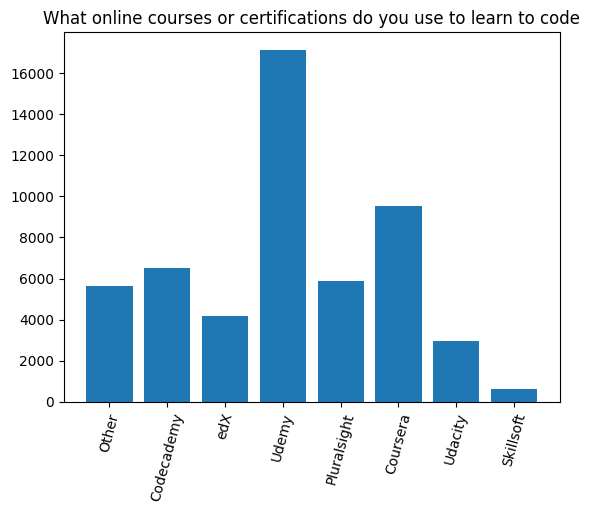

In [ ]:
plt.bar(stackoverflow_2023_df_courses_data.index,stackoverflow_2023_df_courses_data);
plt.xticks(rotation=75)
plt.title(scheme_2023_df.LearnCodeCoursesCert.split("?")[0]);

From this graph we can infer that among the users who learn to code from certification courses prefer Udemy as their first choice and Courses Secures the second position

In [ ]:
scheme_2023_df.CodingActivities

'Which of the following best describes the code you write outside of work? Select all that apply.'

In [ ]:

stackover_2023_df_codingact_data=multi_choice(stackoverflow_2023_df.CodingActivities).sum()
stackover_2023_df_codingact_data

Hobby                                                                  35169
Contribute to open-source projects                                     12888
Bootstrapping a business                                                7304
Professional development or self-paced learning from online courses    18671
I don’t code outside of work                                            5738
Freelance/contract work                                                10258
Other (please specify):                                                  812
School or academic work                                                 6987
dtype: int64

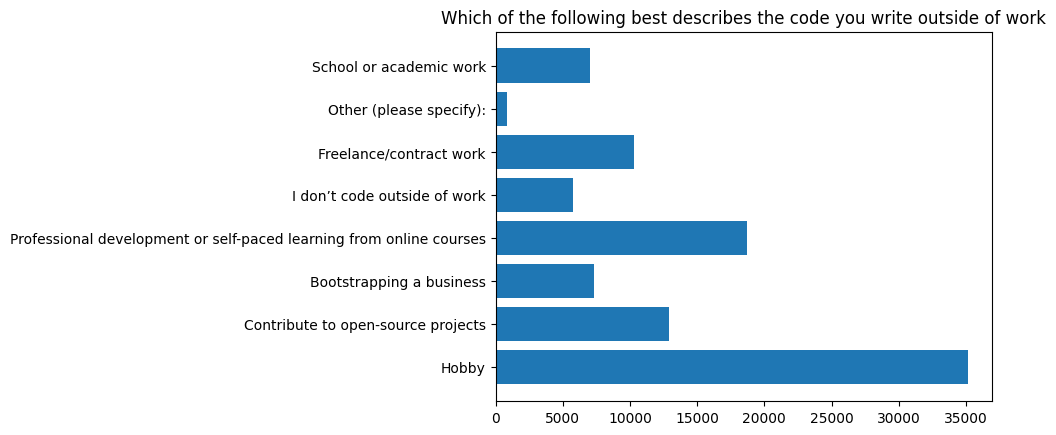

In [ ]:
plt.barh(stackover_2023_df_codingact_data.index,stackover_2023_df_codingact_data);
plt.title(scheme_2023_df.CodingActivities.split("?")[0]);

From this graph it is clear that most of the users code for their hobby outside our but also a significant number of users code outside work to learn from online course.

In [ ]:
scheme_2023_df.YearsCode

'Including any education, how many years have you been coding in total?'

In [ ]:
stackoverflow_2023_df.YearsCode

0         NaN
1        18.0
2        27.0
3        12.0
4         6.0
         ... 
89178    25.0
89179    20.0
89180     5.0
89181    10.0
89182     3.0
Name: YearsCode, Length: 65601, dtype: float64

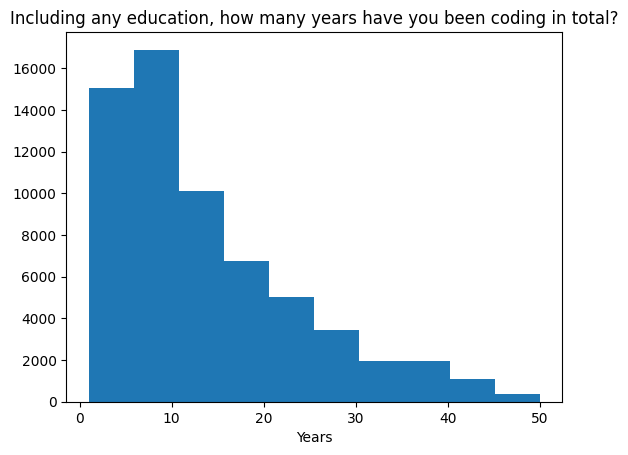

In [ ]:
plt.hist(stackoverflow_2023_df.YearsCode);
plt.title(scheme_2023_df.YearsCode);
plt.xlabel("Years");

Thus we can say that most of the users are coding since 15 years as from the previous graph most of the users are code due to their hobbies.

In [ ]:
scheme_2023_df.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [ ]:
stackoverflow_2023_df.YearsCodePro

0         NaN
1         9.0
2        23.0
3         7.0
4         4.0
         ... 
89178    22.0
89179     5.0
89180     NaN
89181     NaN
89182     NaN
Name: YearsCodePro, Length: 65601, dtype: float64

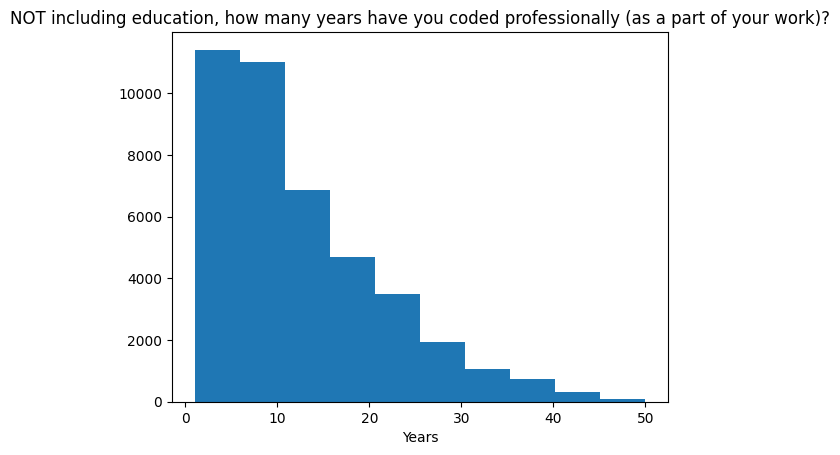

In [ ]:
plt.hist(stackoverflow_2023_df.YearsCodePro);
plt.title(scheme_2023_df.YearsCodePro);
plt.xlabel("Years");

It can be seen that most of the users code since 10 years professional and from the previous graph it is clear that most of the users are coding since 15 years including their education and as most of the users have done Bachelor or Maste degree which is of 3-4 duration.

From Education section we conclude that:-

1-Moajority of StackOverFlow users have done Bachelor or Matsers Degree.

2-A large number of users learn to code from online resources which include:- Formal Documentations, StackOverFlow, Online Tutorials,Blogs.

3- Also Udemy is the first choice of the users who learn to code from certification courses followed by Coursera.

4-Coding is the hobby of a lot of users.

5-Maximum users are doing coding since 10 years

# Time Spend On StackOverFlow

In [ ]:
scheme_2023_df.SOVisitFreq

'How frequently would you say you visit Stack Overflow?'

In [ ]:
stackoverflow_2023_df_visit_data=stackoverflow_2023_df.SOVisitFreq.value_counts()
stackoverflow_2023_df_visit_data

A few times per week                   20421
Daily or almost daily                  15629
A few times per month or weekly        15328
Multiple times per day                  8481
Less than once per month or monthly     3794
Name: SOVisitFreq, dtype: int64

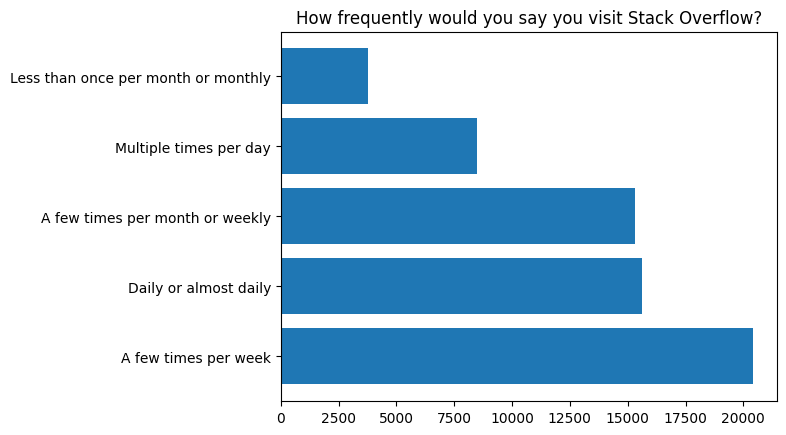

In [ ]:
plt.barh(stackoverflow_2023_df_visit_data.index,stackoverflow_2023_df_visit_data);
plt.title(scheme_2023_df.SOVisitFreq);

It can be seen that most of the users visit StackOverFlow a few times per week and from our previous interpretation it is clear that most of them are professional full time developer

In [ ]:
scheme_2023_df.SOPartFreq

'How frequently would you say you participate in Q&amp;A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.'

In [ ]:
stackoverflow_2023_df_qa_data=stackoverflow_2023_df.SOVisitFreq.value_counts()
stackoverflow_2023_df_qa_data

A few times per week                   20421
Daily or almost daily                  15629
A few times per month or weekly        15328
Multiple times per day                  8481
Less than once per month or monthly     3794
Name: SOVisitFreq, dtype: int64

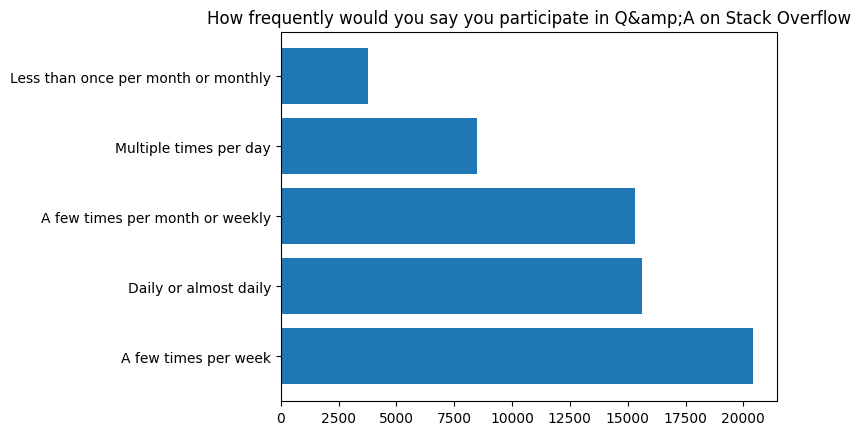

In [ ]:
plt.barh(stackoverflow_2023_df_qa_data.index,stackoverflow_2023_df_qa_data);
plt.title(scheme_2023_df.SOPartFreq.split("?")[0]);

It can be seen that most of the users participatein Question and answer a few times per week and from the previous graph it was clear that most of the users are visiting StackOverFlow a few times per week as they are professional developers